Preguntas a responder: 

- P: ¿Cuánto se ganó en 2019?
- P: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?
- P: ¿Qué ciudad tuvo el mayor número de ventas?
- P: ¿A qué hora debemos mostrar publicidad para maximizar probabilidad de que el cliente compre el producto?
- P: ¿Qué producto vendió más? ¿Por qué crees que vendió más?



Columnas

Order ID: Cada pedido recibe su propio ID de pedido que no se duplicará. Este número puede ser útil para el vendedor cuando intenta averiguar ciertos detalles sobre un pedido, como la fecha o el estado del envío.
Product: Producto vendido.
Quantity ordered: la cantidad solicitada es la cantidad total de artículos solicitados en el pedido inicial (sin ningún cambio)
Price Each: Precio de cada producto. 
Order Date: Esta es la fecha en que el cliente solicita que se envíe el pedido.
Purchase Address: Dirección de compra

Importar librerías 

In [185]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importar los conjuntos de datos sin procesar

In [186]:
jan_data = pd.read_csv("Datasets/Sales_January_2019.csv")
feb_data = pd.read_csv("Datasets/Sales_February_2019.csv")
march_data = pd.read_csv("Datasets/Sales_March_2019.csv")
april_data = pd.read_csv("Datasets/Sales_April_2019.csv")
may_data = pd.read_csv("Datasets/Sales_May_2019.csv")
june_data = pd.read_csv("Datasets/Sales_June_2019.csv")
july_data = pd.read_csv("Datasets/Sales_July_2019.csv")
aug_data = pd.read_csv("Datasets/Sales_August_2019.csv")
sep_data = pd.read_csv("Datasets/Sales_September_2019.csv")
oct_data = pd.read_csv("Datasets/Sales_October_2019.csv")
nov_data = pd.read_csv("Datasets/Sales_November_2019.csv")
dec_data = pd.read_csv("Datasets/Sales_December_2019.csv")



Unir todos los datasets


In [187]:
df = pd.concat([jan_data, feb_data, march_data, april_data, may_data,june_data,july_data,aug_data,
               sep_data, oct_data, nov_data, dec_data])

Visualizamos las primeras 5 filas 

In [188]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Visualizamos el tamaño del dataset

In [189]:
df.shape

(186850, 6)

Chequeo de nulos

In [190]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Eliminamos los nulos

In [191]:
df = df.dropna(how='all', inplace=False)

In [192]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [193]:
df.shape   # se eliminaron 545 filas correspondientes a los datos nulos 

(186305, 6)

Visualizar el tipo de datos de la columnas

In [194]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Convertir el tipo de datos de las columnas 

In [196]:
df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

La columna Price Each posee en algunas filas incorrecto el precio, se eliminan esas filas donde el precio es "Price Each"

In [197]:
df = df.drop(df[df['Price Each']=='Price Each'].index)

In [198]:
df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [195]:
df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

La columna Quantity Ordered posee en algunas filas incorrecta la cantidad, se eliminan esas filas donde la cantidad es "Quantity Ordered"

In [199]:
df = df.drop(df[df['Quantity Ordered']=='Quantity Ordered'].index)

In [200]:
df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [201]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)
df['Price Each'] = pd.to_numeric(df['Price Each']).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [202]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Obtener la ubicación y el estado 

In [203]:
df["Consumer_Primary_Location"] = df['Purchase Address'].apply(lambda x: x.split(',')[0])


In [204]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St


In [205]:
df["Consumer_State"] =  df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [206]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location,Consumer_State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland


Obtenemos el mes del pedido 

In [207]:
df['Month'] = df['Order Date'].dt.month

In [208]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location,Consumer_State,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,1


Obtenemos la hora de los pedidos 

In [209]:
df['time'] = df['Order Date'].dt.hour

In [210]:
df['time'].head(5)

0    21
1    14
2    13
3    20
4    11
Name: time, dtype: int64

P: ¿Cuánto se ganó en 2019?

In [211]:
ganancias = round((df['Quantity Ordered'] * df['Price Each']).sum(),2)

In [212]:
ganancias

33879779.77

En el año 2019 se obtuvo una ganancia de $ 33.879.779,77

- P: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?

In [215]:
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

In [216]:
ganancia_mes = df[['Revenue','Month']].groupby('Month').sum().reset_index()

In [217]:
ganancia_mes = ganancia_mes.sort_values('Revenue', ascending = False)

In [218]:
df_ganancias = pd.DataFrame(ganancia_mes)
df_ganancias

,Month,Revenue
11,12,4557905.42
9,10,3679254.16
3,4,3336376.42
10,11,3149785.09
4,5,3101881.04
2,3,2755969.40
6,7,2587444.91
5,6,2524464.99
7,8,2191698.31
1,2,2158127.48


In [219]:
df_ganancias.index = df_ganancias['Month']
df_ganancias = df_ganancias.drop('Month', axis='columns')


In [220]:
x = df_ganancias.index
y = df_ganancias['Revenue']
y

Month
12    4557905.42
10    3679254.16
4     3336376.42
11    3149785.09
5     3101881.04
3     2755969.40
7     2587444.91
6     2524464.99
8     2191698.31
2     2158127.48
9     2050361.26
1     1786511.29
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Ganancias por mes')

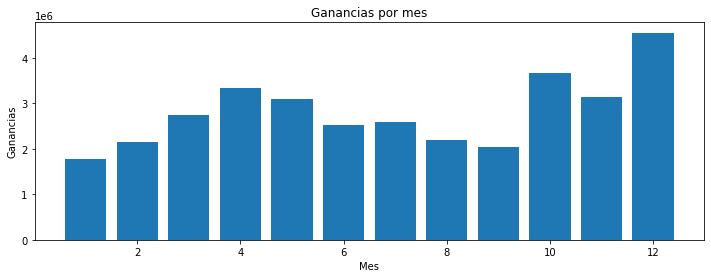

In [221]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, y)
ax.set_xlabel('Mes')                  
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por mes')


El mes con mejores ventas es Diciembre, con un total de $ 4.557.905,42

- P: ¿Qué ciudad tuvo el mayor número de ventas?

In [222]:
ganancia_ciudades = df[['Revenue','Consumer_State']].groupby('Consumer_State').sum().reset_index() 

In [223]:
ganancia_ciudades = ganancia_ciudades.sort_values('Revenue', ascending = False)

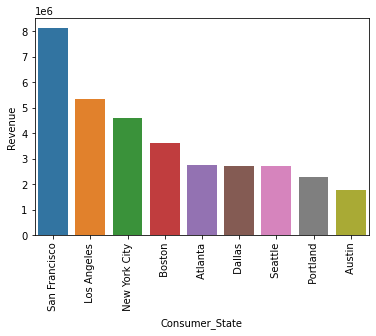

In [224]:
plt_1 = sns.barplot(x=ganancia_ciudades['Consumer_State'], y=ganancia_ciudades['Revenue'])

for item in plt_1.get_xticklabels():
    item.set_rotation(90)


In [225]:
ganancia_ciudades 

,Consumer_State,Revenue
7,San Francisco,8124120.94
4,Los Angeles,5354039.93
5,New York City,4581658.91
2,Boston,3604080.86
0,Atlanta,2741642.05
3,Dallas,2717793.72
8,Seattle,2693048.60
6,Portland,2276649.24
1,Austin,1786745.52


La ciudad con el mayor número de ventas es San Francisco

P: ¿A qué hora debemos mostrar publicidad para maximizar la probabilidad de que el cliente compre el producto?

In [226]:
ganancia_hora = df[['Revenue','time']].groupby('time').sum().reset_index()

In [227]:
ganancia_hora = ganancia_hora.sort_values('Revenue', ascending = False)

In [228]:
ganancia_hora.index = ganancia_hora['time']
ganancia_hora = ganancia_hora.drop('time', axis='columns')


In [229]:
x = ganancia_hora.index
y = ganancia_hora['Revenue']

Text(0.5, 1.0, 'Ganancia por hora')

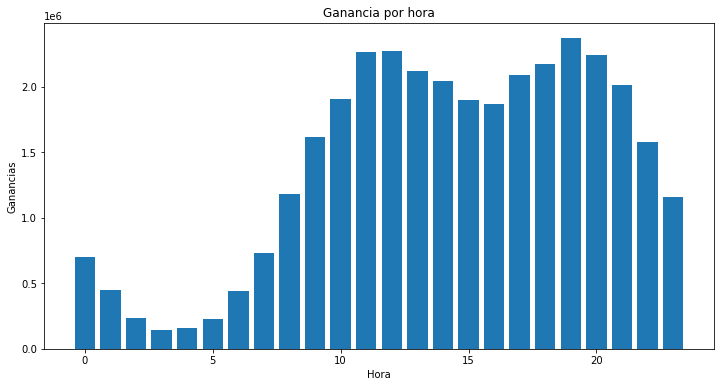

In [230]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, y)
ax.set_xlabel('Hora')                  
ax.set_ylabel('Ganancias')
ax.set_title('Ganancia por hora')


In [231]:
ganancia_hora.head(5)

,Revenue
time,
19,2370005.59
12,2269676.91
11,2267169.73
20,2242856.37
18,2176209.65


Debemos mostrar publicidad alas 19hs para maximizar la probabilidad de que el cliente compre el producto.

- P: ¿Qué producto vendió más? ¿Por qué crees que vendió más?

In [254]:
productos = df[['Quantity Ordered','Product']].groupby('Product').sum().reset_index()

In [255]:
productos = productos.sort_values('Quantity Ordered', ascending = False)

In [256]:
productos= productos.rename(columns = {'Quantity Ordered': 'Quantity'})

In [257]:
productos

,Product,Quantity
5,AAA Batteries (4-pack),30487
4,AA Batteries (4-pack),27148
15,USB-C Charging Cable,23555
12,Lightning Charging Cable,22841
17,Wired Headphones,20201
6,Apple Airpods Headphones,15383
7,Bose SoundSport Headphones,13236
2,27in FHD Monitor,7429
18,iPhone,6732
1,27in 4K Gaming Monitor,6134


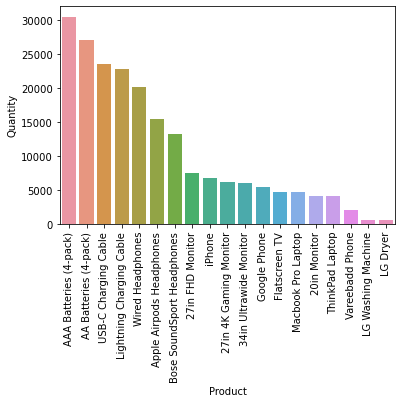

In [258]:
plt = sns.barplot(x= productos['Product'], y=productos['Quantity'])

for item in plt.get_xticklabels():
    item.set_rotation(90)

El producto mas vendido fue "AAA Batteries (4-pack)", considero que fue el mas vendido por ser común, esas pilas corresponden a 
controles de televisores, aires acondicionados, teclados, etc. 